It is widely regarded taht Taylor Swift's 'eras' have a disticnt sound signature and a distint writting style, the (typically) two years between every album realease are spent in her 'reinventing' her style and she produces something diffferent every era, so how true is that?

If that is a 100% true a clustering algorithm should place all albums (evermore and folklore are in one _technically_) in seperate clusters, but that is obvoiusly not going to happen, so lets investigate

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import random
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests

In [10]:
cid ='d888370f9c2a4514aade84a1b6ae976e'
secret ='01774fdc665e4dcc8dc8c48667e46bf1'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [11]:
l = ['7eX5SypK35V8Y9d9pS6rWy',
        '4fPBB44eDH71YohayI4eKV',
        #'2M7UdnD0fEaryh8TnCvqFX',
        #'6LqZFfv4fUP7va14Y6VW9a',
]

print(sp.audio_features(tracks=l))

[{'danceability': 0.472, 'energy': 0.746, 'key': 11, 'loudness': -4.816, 'mode': 1, 'speechiness': 0.0321, 'acousticness': 0.00581, 'instrumentalness': 0.663, 'liveness': 0.0999, 'valence': 0.403, 'tempo': 97.44, 'type': 'audio_features', 'id': '7eX5SypK35V8Y9d9pS6rWy', 'uri': 'spotify:track:7eX5SypK35V8Y9d9pS6rWy', 'track_href': 'https://api.spotify.com/v1/tracks/7eX5SypK35V8Y9d9pS6rWy', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7eX5SypK35V8Y9d9pS6rWy', 'duration_ms': 162040, 'time_signature': 4}, {'danceability': 0.63, 'energy': 0.908, 'key': 11, 'loudness': -2.42, 'mode': 1, 'speechiness': 0.0326, 'acousticness': 0.0238, 'instrumentalness': 0.592, 'liveness': 0.116, 'valence': 0.968, 'tempo': 120.522, 'type': 'audio_features', 'id': '4fPBB44eDH71YohayI4eKV', 'uri': 'spotify:track:4fPBB44eDH71YohayI4eKV', 'track_href': 'https://api.spotify.com/v1/tracks/4fPBB44eDH71YohayI4eKV', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4fPBB44eDH71YohayI4eKV', 'durat

In [12]:
# df = pd.read_csv('spotify_hist_sept.csv')

# df.query('uri==3kKb3U3a8jmUJQB9ypE1Jl')['track name']
# print(df.loc[df['uri'] == '3kKb3U3a8jmUJQB9ypE1Jl', 'track_name'].iloc[0])
# df.head(10)


In [13]:
def get_track_features(df):
    uri_real = []
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    duration_ms = []

    for i in df['uri']:
        print(df.loc[df['uri'] == i, 'track_name'].iloc[0])
        for x in sp.audio_features(tracks=[i]):
            # uri_real.append(x['uri'])
            danceability.append(x['danceability'])
            energy.append(x['energy'])
            key.append(x['key'])
            loudness.append(x['loudness'])
            speechiness.append(x['speechiness'])
            acousticness.append(x['acousticness'])
            instrumentalness.append(x['instrumentalness'])
            liveness.append(x['liveness'])
            valence.append(x['valence'])
            tempo.append(x['tempo'])
            duration_ms.append(x['duration_ms'])
            
    df2 = pd.DataFrame({
    # 'uri_real': uri_real,
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'tempo':tempo,
    'duration_ms':duration_ms})

    df3 = df.merge(df2, left_index= True, right_index= True)
    
    return df3

In [14]:
def get_album_tracks_and_features(uri_info):
    uri = []
    track = []
    duration = []
    explicit = []
    track_number = []
    album_artist = sp.album(uri_info)
    album = album_artist['name']
    artist = album_artist['artists'][0]['name']
    one = sp.album_tracks(uri_info, limit=50, offset=0, market='US')
    df1 = pd.DataFrame(one)
    
    for i, x in df1['items'].items():
        uri.append(x['uri'])
        track.append(x['name'])
        explicit.append(x['explicit'])
        track_number.append(x['track_number'])
    
    # print(uri)
    # print(track)
    print(album)
    # print(explicit)
    # print(track_number)
    df2 = pd.DataFrame({
    'uri':uri,
    'track_number':track_number,
    'track_name':track,
    'album':album,
    'artist':artist,
    'explicit':explicit})

    df3 = get_track_features(df2)
    
    return df3

In [15]:
with open('album_links.txt', 'r') as f:
    albums = [l.rstrip() for l in f.readlines()]

frames = []
for i in albums:
    df_interim = get_album_tracks_and_features(i)
    frames.append(df_interim)

df = pd.concat(frames, ignore_index=True)

df.to_csv('taylor_discography_features.csv', index=False)
df.head()

evermore (deluxe version)
willow
champagne problems
gold rush
‘tis the damn season
tolerate it
no body, no crime (feat. HAIM)
happiness
dorothea
coney island (feat. The National)
ivy
cowboy like me
long story short
marjorie
closure
evermore (feat. Bon Iver)
right where you left me - bonus track
it’s time to go - bonus track
Fearless (Taylor's Version)
Fearless (Taylor’s Version)
Fifteen (Taylor’s Version)
Love Story (Taylor’s Version)
Hey Stephen (Taylor’s Version)
White Horse (Taylor’s Version)
You Belong With Me (Taylor’s Version)
Breathe (feat. Colbie Caillat) (Taylor’s Version)
Tell Me Why (Taylor’s Version)
You’re Not Sorry (Taylor’s Version)
The Way I Loved You (Taylor’s Version)
Forever & Always (Taylor’s Version)
The Best Day (Taylor’s Version)
Change (Taylor’s Version)
Jump Then Fall (Taylor’s Version)
Untouchable (Taylor’s Version)
Forever & Always (Piano Version) (Taylor’s Version)
Come In With The Rain (Taylor’s Version)
Superstar (Taylor’s Version)
The Other Side Of The Do

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,0.1700,0.833,0.001790,0.1450,0.529,81.112,214707
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,0.0377,0.920,0.000000,0.1130,0.320,171.319,244000
2,spotify:track:3Dby3p1m6IOZn2gIIqECgK,3,gold rush,evermore (deluxe version),Taylor Swift,True,0.512,0.462,9,-10.491,0.0408,0.830,0.166000,0.1210,0.353,112.050,185320
3,spotify:track:6sQckd3Z8NPxVVKUnavY1F,4,‘tis the damn season,evermore (deluxe version),Taylor Swift,False,0.575,0.434,5,-8.193,0.0312,0.735,0.000066,0.1050,0.348,145.916,229840
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,0.0488,0.878,0.000027,0.0797,0.221,74.952,245440


In [16]:
# df = pd.read_csv('taylor_discography_features.csv')

df.tail(25)

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
174,spotify:track:6IH2Z54gYPLqgJtxZjX80i,18,Back To December - Acoustic,Speak Now (Deluxe Package),Taylor Swift,False,0.541,0.453,2,-6.459,0.0266,0.74800,0.000000,0.2000,0.3770,141.757,292560
175,spotify:track:62rlxI6g2PNaWsHoiRryto,19,Haunted - Acoustic Version,Speak Now (Deluxe Package),Taylor Swift,False,0.563,0.443,5,-5.078,0.0247,0.84200,0.000000,0.2930,0.3130,80.962,217613
176,spotify:track:0dBW6ZsW8skfvoRfgeerBF,1,Mine,Speak Now (Deluxe Package),Taylor Swift,False,0.624,0.757,7,-2.940,0.0296,0.00265,0.000002,0.1890,0.6580,121.070,230707
177,spotify:track:3DrjZArsPsoqbLzUZZV1Id,3,Back To December,Speak Now (Deluxe Package),Taylor Swift,False,0.529,0.670,2,-4.663,0.0303,0.11700,0.000000,0.3340,0.2860,141.893,293027
178,spotify:track:3RBluWmSoG2pGA1OePzGJI,7,The Story Of Us,Speak Now (Deluxe Package),Taylor Swift,False,0.543,0.818,4,-3.611,0.0398,0.00478,0.000368,0.0357,0.6830,139.898,265667
179,spotify:track:4g2c7NoTWAOSYDy44l9nub,1,Lavender Haze,Midnights (3am Edition),Taylor Swift,True,0.735,0.444,10,-10.519,0.0684,0.20400,0.001200,0.1700,0.0984,97.038,202396
180,spotify:track:199E1RRrVmVTQqBXih5qRC,2,Maroon,Midnights (3am Edition),Taylor Swift,True,0.658,0.378,7,-8.300,0.0379,0.05930,0.000000,0.0976,0.0382,108.034,218271
181,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,3,Anti-Hero,Midnights (3am Edition),Taylor Swift,False,0.638,0.634,4,-6.582,0.0457,0.13300,0.000001,0.1520,0.5190,96.953,200690
182,spotify:track:6ADDIJxxqzM9LMpm78yzQG,4,Snow On The Beach (feat. Lana Del Rey),Midnights (3am Edition),Taylor Swift,True,0.659,0.323,9,-13.425,0.0436,0.73500,0.003210,0.1160,0.1540,110.007,256124
183,spotify:track:7gVWKBcfIW93YxNBi3ApIE,5,"You're On Your Own, Kid",Midnights (3am Edition),Taylor Swift,False,0.694,0.380,2,-10.307,0.0614,0.41600,0.000008,0.1260,0.3760,120.044,194207


def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

df_features = parallelize_dataframe(df, get_track_features)

In [17]:
from requests import exceptions
import lyricsgenius as lg
import re

token = '0GGXQLMawu2kxxYNqTGFT79I0wq8McYb8jbOz0HGOQc-sCAmu0HuYKo_C71dsRg-'
genius = lg.Genius(token)
matcher = re.compile(r'^https://genius.com/Taylor-swift-[a-zA-Z0-9_\'"?’-]*-lyrics$')

def get_lyrics(df):
    song_name, artist_name = df['track_name'], df['artist']

    if '(' in song_name and 'Taylor\'s Version' not in song_name:
        song_name = song_name.split('(')[0]


    songs = genius.search_songs(song_name + ' ' + artist_name)

    # url = songs['hits']
    url = songs['hits'][0]['result']['url']
    print(url)

    if re.match(matcher, url) is None:
        name = song_name.lower().split(' ')
        name_fixed = []
        for i in name:
            if i == '-':
                continue

            if i == 'bonus':
                continue

            if i == 'track':
                continue

            if '’' in i:
                i = list(i)
                i.remove('’')
                i = ''.join(i)

            if i == '':
                continue

            if i[-1] == '.':
                i = i[:-1]
            
            name_fixed.append(i)

        

        name = '-'.join(name_fixed)

        if name == 'nothing-new':
            name = name + '-taylors-version-from-the-vault'

        if name == 'teardrops-on-my-guitar-radio-single-remix':
            name = 'teardrops-on-my-guitar'
            
        url = 'https://genius.com/Taylor-swift-' + name + '-lyrics'
        print(f'fixed url: {url}')


    try:
        song_lyrics = genius.lyrics(song_url=url)
    except requests.exceptions.Timeout:
        try:
            song_lyrics = genius.lyrics(song_url=url)
        except requests.exceptions.Timeout:
            try:
                song_lyrics = genius.lyrics(song_url=url)
            except requests.exceptions.Timeout:
                print(f'{song_name} pooped itself')
                song_lyrics = 'timeout'
    
    if song_lyrics is None:
        song_lyrics = 'none for some reason'

    

    


    df['lyrics'] = song_lyrics.split('\n')
    df['lyrics-url'] = url

    return df


    # for song in songs['hits']:
    #     url = song['result']['url']
    #     song_lyrics = genius.lyrics(song_url=url)
    #     # id = song['result']['id']
    #     # song_lyrics = genius.lyrics(id)
    #     lyrics.append(song_lyrics)
# print(get_lyrics('We Were Happy (Taylor’s Version) (From The Vault)', 'Taylor Swift'))



def lyrics_onto_frame(df1):
    for i, v in enumerate(zip(df1['track_name'], df1['artist'])):
        test = get_lyrics(v[0], v[1])[0]

        print(i)
        df1.loc[df.index[i], 'lyrics'] = test

df = df.apply(get_lyrics, axis=1)





https://genius.com/Taylor-swift-willow-lyrics
https://genius.com/Taylor-swift-champagne-problems-lyrics
https://genius.com/Taylor-swift-gold-rush-lyrics
https://genius.com/Taylor-swift-tis-the-damn-season-lyrics
https://genius.com/Taylor-swift-tolerate-it-lyrics
https://genius.com/Taylor-swift-no-body-no-crime-lyrics
https://genius.com/Taylor-swift-happiness-lyrics
https://genius.com/Taylor-swift-dorothea-lyrics
https://genius.com/Taylor-swift-coney-island-lyrics
https://genius.com/Taylor-swift-ivy-lyrics
https://genius.com/Taylor-swift-cowboy-like-me-lyrics
https://genius.com/Portorosso-milos-discontinued-2022-listening-log-ii-annotated
fixed url: https://genius.com/Taylor-swift-long-story-short-lyrics
https://genius.com/Taylor-swift-marjorie-lyrics
https://genius.com/Taylor-swift-closure-lyrics
https://genius.com/Taylor-swift-evermore-lyrics
https://genius.com/Genius-users-2017-user-interview-an-enlightening-madkool-convo-with-madkol-annotated
fixed url: https://genius.com/Taylor-swi

In [37]:
#df.to_csv('taylor_discography_features_and_lyrics.csv', index=False)
#df.to_pickle('taylor_discography_features_and_lyrics_stilllists.pkl')


df = pd.read_pickle('taylor_discography_features_and_lyrics_stilllists.pkl')


In [38]:
df['lyrics'].iloc[69]

['TranslationsEspañolPortuguêsTaylor Swift - Forever Winter (Taylor’s Version) [From the Vault] (ترجمه\u200cی فارسی)Forever Winter (Taylor’s Version) [From the Vault] Lyrics[Verse 1]',
 "He says he doesn't believe anything much he hears these days",
 'He says, "Why fall in love, just so you can watch it go away?"',
 'He spends most of his nights wishing it was how it used to be',
 'He spends most of his flights getting pulled down by gravity',
 '',
 '[Pre-Chorus]',
 'I call, just checking up on him',
 "He's up, 3 AM, pacing",
 'He says, "It\'s not just a phase I\'m in"',
 'My voice comes out begging',
 '[Chorus]',
 "All this time I didn't know",
 'You were breaking down',
 "I'd fall to pieces on the floor",
 "If you weren't around",
 'Too young to know it gets better',
 "I'll be summer sun for you forever",
 'Forever winter if you go',
 '',
 '[Verse 2]',
 'He seems fine most of the time',
 'Forcing smiles and never minds',
 'His laugh is a symphony',
 "When the lights go out, it's hard

In [39]:
embed_remover = re.compile(r'\D*')


def remove_song_anatomy_tags(l):

    
    l = l[1::]
    edited = []

    last_line = l[-1]
    last_line = last_line.split(' ')
    last_line[-1] = re.findall(embed_remover, last_line[-1])[0]
    l[-1] = ' '.join(last_line)

    for i in l:
        if i == '':
            continue

        if i == ' ':
            continue
        
        if i[0] == '[' and i[-1] == ']':
            continue

        if '[' in i:
            continue
        
        if i[-1] == '"' and i[-2] not in '?!.':
            i = i[:-1] + '."'

        if i[-1] not in ',"?':
            i = i + '.'

        edited.append(i)
    
    # last_line = edited[-1]
    # last_line = last_line.split(' ')
    # last_line[-1] = re.findall(embed_remover, last_line[-1])[0]
    # edited[-1] = ' '.join(last_line)
    # edited[-1] = re.findall(embed_remover, )[0]
    
    return ' '.join(edited)


# remove_song_anatomy_tags(df['lyrics'].iloc[69])


df['lyrics'] = df['lyrics'].apply(lambda x: remove_song_anatomy_tags(x))
df.to_csv('taylor_discography_features_and_lyrics.csv', index=False)
df.to_pickle('taylor_discography_features_and_lyrics.pkl')
# 
df

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics-url
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,0.1700,0.833,0.001790,0.1450,0.529,81.112,214707,I'm like the water when your ship rolled in th...,https://genius.com/Taylor-swift-willow-lyrics
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,0.0377,0.920,0.000000,0.1130,0.320,171.319,244000,You booked the night train for a reason. So yo...,https://genius.com/Taylor-swift-champagne-prob...
2,spotify:track:3Dby3p1m6IOZn2gIIqECgK,3,gold rush,evermore (deluxe version),Taylor Swift,True,0.512,0.462,9,-10.491,0.0408,0.830,0.166000,0.1210,0.353,112.050,185320,"Gleaming, twinkling. Eyes like sinking ships o...",https://genius.com/Taylor-swift-gold-rush-lyrics
3,spotify:track:6sQckd3Z8NPxVVKUnavY1F,4,‘tis the damn season,evermore (deluxe version),Taylor Swift,False,0.575,0.434,5,-8.193,0.0312,0.735,0.000066,0.1050,0.348,145.916,229840,If I wanted to know who you were hanging with....,https://genius.com/Taylor-swift-tis-the-damn-s...
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,0.0488,0.878,0.000027,0.0797,0.221,74.952,245440,I sit and watch you reading with your head low...,https://genius.com/Taylor-swift-tolerate-it-ly...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,spotify:track:7712gjoih4QoDbXpljEk21,16,Paris,Midnights (3am Edition),Taylor Swift,False,0.700,0.509,7,-10.547,0.0789,0.112,0.000033,0.1370,0.345,110.947,196259,"""Your ex-friend's sister. Met someone at a clu...",https://genius.com/Taylor-swift-paris-lyrics
195,spotify:track:5kiZGSxgqPdv6rbqL9THdd,17,High Infidelity,Midnights (3am Edition),Taylor Swift,False,0.646,0.529,10,-10.179,0.0864,0.723,0.000000,0.0885,0.755,87.862,231475,"Lock broken, slur spoken. Wound open, game tok...",https://genius.com/Taylor-swift-high-infidelit...
196,spotify:track:6wAFvJPpTZVirBKGZ4EnMW,18,Glitch,Midnights (3am Edition),Taylor Swift,False,0.675,0.466,11,-9.738,0.2010,0.361,0.000000,0.1100,0.347,140.864,148781,We were supposed to be just friends. You don't...,https://genius.com/Taylor-swift-glitch-lyrics
197,spotify:track:0aV5uARAknQgYhBaK944FP,19,"Would've, Could've, Should've",Midnights (3am Edition),Taylor Swift,False,0.483,0.840,7,-6.508,0.1190,0.430,0.000575,0.1460,0.550,157.979,260362,"If you would've blinked, then I would've. Look...",https://genius.com/Taylor-swift-wouldve-couldv...


In [82]:
df = pd.read_pickle('taylor_discography_features_and_lyrics.pkl')

df.head(10)

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics-url
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,0.1700,0.833,0.001790,0.1450,0.529,81.112,214707,I'm like the water when your ship rolled in th...,https://genius.com/Taylor-swift-willow-lyrics
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,0.0377,0.920,0.000000,0.1130,0.320,171.319,244000,You booked the night train for a reason. So yo...,https://genius.com/Taylor-swift-champagne-prob...
2,spotify:track:3Dby3p1m6IOZn2gIIqECgK,3,gold rush,evermore (deluxe version),Taylor Swift,True,0.512,0.462,9,-10.491,0.0408,0.830,0.166000,0.1210,0.353,112.050,185320,"Gleaming, twinkling. Eyes like sinking ships o...",https://genius.com/Taylor-swift-gold-rush-lyrics
3,spotify:track:6sQckd3Z8NPxVVKUnavY1F,4,‘tis the damn season,evermore (deluxe version),Taylor Swift,False,0.575,0.434,5,-8.193,0.0312,0.735,0.000066,0.1050,0.348,145.916,229840,If I wanted to know who you were hanging with....,https://genius.com/Taylor-swift-tis-the-damn-s...
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,0.0488,0.878,0.000027,0.0797,0.221,74.952,245440,I sit and watch you reading with your head low...,https://genius.com/Taylor-swift-tolerate-it-ly...
5,spotify:track:6uwfVkaOM1mcMkFmSn35ix,6,"no body, no crime (feat. HAIM)",evermore (deluxe version),Taylor Swift,False,0.546,0.613,7,-7.589,0.0264,0.418,0.000000,0.1030,0.535,79.015,215627,He did it. He did it. Este's a friend of mine....,https://genius.com/Taylor-swift-no-body-no-cri...
6,spotify:track:55Vf4bimc1Rtfg0PAQRAo2,7,happiness,evermore (deluxe version),Taylor Swift,True,0.559,0.334,11,-10.733,0.0376,0.870,0.000000,0.1140,0.211,122.079,315147,"Honey, when I'm above the trees. I see this fo...",https://genius.com/Taylor-swift-happiness-lyrics
7,spotify:track:66tOfHVH3aUrscg8vExRV4,8,dorothea,evermore (deluxe version),Taylor Swift,False,0.605,0.488,4,-8.322,0.0264,0.696,0.000000,0.1290,0.354,119.966,225880,"Hey, Dorothea, do you ever stop and think abou...",https://genius.com/Taylor-swift-dorothea-lyrics
8,spotify:track:2awNGIJHodfLZSClB3PYhz,9,coney island (feat. The National),evermore (deluxe version),Taylor Swift,False,0.537,0.537,8,-11.266,0.0617,0.819,0.000904,0.1420,0.292,107.895,275320,Break my soul in two looking for you. But you'...,https://genius.com/Taylor-swift-coney-island-l...
9,spotify:track:43Ykum9T72UOPhBN31grpN,10,ivy,evermore (deluxe version),Taylor Swift,True,0.515,0.545,2,-9.277,0.0353,0.855,0.000020,0.0921,0.535,88.856,260440,How's one to know? I'd meet you where the spir...,https://genius.com/Taylor-swift-ivy-lyrics


## adding penmanship

In [83]:
df['penmanship'] = 'unknown'

q = ['Anti-Hero', 'Snow On The Beach (feat. Lana Del Rey)', 'Mastermind', 'ivy', 'hoax', 
      'my tears ricochet', 'epiphany', 'the last great american dynasty', 'peace', 'willow',
      'tolerate it', 'happiness', "Red (Taylor's Version)", 'evermore (feat. Bon Iver)', 'cowboy like me', "Sad Beautiful Tragic (Taylor's Version)"]

df.loc[df['track_name'].isin(q), ['penmanship']] = 'quill'

f = ['Lavender Haze', 'Maroon', "You're On Your Own, Kid", 'Midnight Rain', 'Labyrinth', 'Sweet Nothing', 'Question...?',
        'False God', 'Cruel Summer', 'exile (feat. Bon Iver)', 'the 1', 'betty', 'champagne problems', 'marjorie', 'Lover', 'The Archer',
        'Cornelia Street', "White Horse (Taylor’s Version)", 'right where you left me - bonus track', "Treacherous (Taylor's Version)", 'long story short',
        "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)", "State Of Grace (Taylor's Version)", "I Almost Do (Taylor's Version)", "Holy Ground (Taylor's Version)"]

df.loc[df['track_name'].isin(f), ['penmanship']] = 'fountain'

g = ['Bejeweled', 'Karma', 'I Forgot That You Existed', "We Are Never Ever Getting Back Together (Taylor's Version)", "You Belong With Me (Taylor’s Version)",
        'I Think He Knows', 'London Boy', 'You Need To Calm Down', "Jump Then Fall (Taylor’s Version)", "22 (Taylor's Version)", "Today Was A Fairytale (Taylor’s Version)", "Hey Stephen (Taylor’s Version)", 'Afterglow']

df.loc[df['track_name'].isin(g), ['penmanship']] = 'glitter'

# print(df['track_name'].iloc[15])

df['penmanship'].value_counts()

# df[df['penmanship'] == 'fountain'].head(25)




unknown     145
fountain     25
quill        16
glitter      13
Name: penmanship, dtype: int64

 - Explicit: The indicator of whether the lyric contains explicit words or expressions.
 - Danceability: The degree of how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. (0~1)
 - Energy: The perceptual measure of intensity based on dynamic range, perceived loudness, timbre, onset rate, and general entropy. (0~1)
 - Key: The estimated overall pitch class of the track and its type of scale from which its melodic content is derived (0 - 11).
 - Loudness: The quality of a sound that is the primary psychological correlate of amplitude in decibel. (-60~0)
 - Speechiness: The presence of spoken words in a track. (0~1) maybe 0 to 0.5
 - Acousticness: The confidence measure whether the track is acoustic. (0~1)
 - Instrumentalness: The confidence measure taht the track is instrumental? (0 - 1)
 - Liveness: The presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. (0~1) _can be dropped_
 - Valence: The musical positiveness conveyed by a track (e.g. happy, cheerful, euphoric). (0~1)
 - Tempo: The overall estimated tempo of a track in beats per minute (BPM). (50~200)
 - Duration: The length of the track in seconds. wont use in the radar plot

In [84]:
df.head(10)

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics-url,penmanship
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,0.1700,0.833,0.001790,0.1450,0.529,81.112,214707,I'm like the water when your ship rolled in th...,https://genius.com/Taylor-swift-willow-lyrics,quill
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,0.0377,0.920,0.000000,0.1130,0.320,171.319,244000,You booked the night train for a reason. So yo...,https://genius.com/Taylor-swift-champagne-prob...,fountain
2,spotify:track:3Dby3p1m6IOZn2gIIqECgK,3,gold rush,evermore (deluxe version),Taylor Swift,True,0.512,0.462,9,-10.491,0.0408,0.830,0.166000,0.1210,0.353,112.050,185320,"Gleaming, twinkling. Eyes like sinking ships o...",https://genius.com/Taylor-swift-gold-rush-lyrics,unknown
3,spotify:track:6sQckd3Z8NPxVVKUnavY1F,4,‘tis the damn season,evermore (deluxe version),Taylor Swift,False,0.575,0.434,5,-8.193,0.0312,0.735,0.000066,0.1050,0.348,145.916,229840,If I wanted to know who you were hanging with....,https://genius.com/Taylor-swift-tis-the-damn-s...,unknown
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,0.0488,0.878,0.000027,0.0797,0.221,74.952,245440,I sit and watch you reading with your head low...,https://genius.com/Taylor-swift-tolerate-it-ly...,quill
5,spotify:track:6uwfVkaOM1mcMkFmSn35ix,6,"no body, no crime (feat. HAIM)",evermore (deluxe version),Taylor Swift,False,0.546,0.613,7,-7.589,0.0264,0.418,0.000000,0.1030,0.535,79.015,215627,He did it. He did it. Este's a friend of mine....,https://genius.com/Taylor-swift-no-body-no-cri...,unknown
6,spotify:track:55Vf4bimc1Rtfg0PAQRAo2,7,happiness,evermore (deluxe version),Taylor Swift,True,0.559,0.334,11,-10.733,0.0376,0.870,0.000000,0.1140,0.211,122.079,315147,"Honey, when I'm above the trees. I see this fo...",https://genius.com/Taylor-swift-happiness-lyrics,quill
7,spotify:track:66tOfHVH3aUrscg8vExRV4,8,dorothea,evermore (deluxe version),Taylor Swift,False,0.605,0.488,4,-8.322,0.0264,0.696,0.000000,0.1290,0.354,119.966,225880,"Hey, Dorothea, do you ever stop and think abou...",https://genius.com/Taylor-swift-dorothea-lyrics,unknown
8,spotify:track:2awNGIJHodfLZSClB3PYhz,9,coney island (feat. The National),evermore (deluxe version),Taylor Swift,False,0.537,0.537,8,-11.266,0.0617,0.819,0.000904,0.1420,0.292,107.895,275320,Break my soul in two looking for you. But you'...,https://genius.com/Taylor-swift-coney-island-l...,unknown
9,spotify:track:43Ykum9T72UOPhBN31grpN,10,ivy,evermore (deluxe version),Taylor Swift,True,0.515,0.545,2,-9.277,0.0353,0.855,0.000020,0.0921,0.535,88.856,260440,How's one to know? I'd meet you where the spir...,https://genius.com/Taylor-swift-ivy-lyrics,quill


In [85]:
df_classed = df[df['penmanship'] != 'unknown']

df_classed.head(30)

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics-url,penmanship
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,0.1700,0.833000,0.001790,0.1450,0.529,81.112,214707,I'm like the water when your ship rolled in th...,https://genius.com/Taylor-swift-willow-lyrics,quill
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,0.0377,0.920000,0.000000,0.1130,0.320,171.319,244000,You booked the night train for a reason. So yo...,https://genius.com/Taylor-swift-champagne-prob...,fountain
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,0.0488,0.878000,0.000027,0.0797,0.221,74.952,245440,I sit and watch you reading with your head low...,https://genius.com/Taylor-swift-tolerate-it-ly...,quill
6,spotify:track:55Vf4bimc1Rtfg0PAQRAo2,7,happiness,evermore (deluxe version),Taylor Swift,True,0.559,0.334,11,-10.733,0.0376,0.870000,0.000000,0.1140,0.211,122.079,315147,"Honey, when I'm above the trees. I see this fo...",https://genius.com/Taylor-swift-happiness-lyrics,quill
9,spotify:track:43Ykum9T72UOPhBN31grpN,10,ivy,evermore (deluxe version),Taylor Swift,True,0.515,0.545,2,-9.277,0.0353,0.855000,0.000020,0.0921,0.535,88.856,260440,How's one to know? I'd meet you where the spir...,https://genius.com/Taylor-swift-ivy-lyrics,quill
10,spotify:track:52OkpDsU6MmPx1AwGOb6Ap,11,cowboy like me,evermore (deluxe version),Taylor Swift,True,0.604,0.517,0,-9.014,0.0347,0.768000,0.000155,0.1230,0.511,127.967,275040,And the tennis court was covered up. With some...,https://genius.com/Taylor-swift-cowboy-like-me...,quill
11,spotify:track:5VYWxXUpxuxEmCqMLDqICo,12,long story short,evermore (deluxe version),Taylor Swift,False,0.546,0.730,0,-7.704,0.0417,0.660000,0.179000,0.0972,0.573,157.895,215920,Fatefully. I tried to pick my battles 'til the...,https://genius.com/Taylor-swift-long-story-sho...,fountain
12,spotify:track:5uICWmZTLkpEVbK22PBP6e,13,marjorie,evermore (deluxe version),Taylor Swift,False,0.535,0.561,5,-11.609,0.0484,0.876000,0.000136,0.1150,0.287,96.103,257773,Never be so kind. You forget to be clever. Nev...,https://genius.com/Taylor-swift-marjorie-lyrics,fountain
14,spotify:track:6Wlq9rqkxrqj5Kls4Kw14H,15,evermore (feat. Bon Iver),evermore (deluxe version),Taylor Swift,False,0.390,0.270,1,-10.673,0.0308,0.937000,0.002270,0.1110,0.320,125.177,304107,Gray November. I've been down since July. Moti...,https://genius.com/Taylor-swift-evermore-lyrics,quill
15,spotify:track:3zwMVvkBe2qIKDObWgXw4N,16,right where you left me - bonus track,evermore (deluxe version),Taylor Swift,False,0.581,0.619,10,-6.524,0.0282,0.769000,0.000106,0.1170,0.645,137.915,245027,"Friends break up, friends get married. Strange...",https://genius.com/Taylor-swift-right-where-yo...,fountain


In [86]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

gpu_available = tf.test.is_gpu_available()
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
print(f'{gpu_available = }')
print(f'{is_cuda_gpu_available = }')

bert_preprocess = hub.KerasLayer('bert_en_uncased_preprocess_3.tar')
bert_encoder = hub.KerasLayer('bert_en_uncased_L-24_H-1024_A-16_4.tar')


gpu_available = True
is_cuda_gpu_available = True


In [87]:
def get_embedding(sentence):
    preprocessed_text = bert_preprocess(sentence)
    # print(sentence[:20])
    # return preprocessed_text
    return bert_encoder(preprocessed_text)['pooled_output']

# print(get_embedding(["It. feels. feels, like. a perfect night To dress up like hipsters And make fun of our exes Uh-uh, uh-uh It feels like a perfect night For breakfast at midnight To fall in love with strangers Uh-uh, uh-uh"]))


In [88]:
# get_embedding(["It feels like a perfect night To dress up like hipsters And make fun of our exes Uh-uh, uh-uh It feels like a perfect night For breakfast at midnight To fall in love with strangers Uh-uh, uh-uh Yeah We're happy, free, confused, and lonely at the same time It's miserable and magical, oh yeah Tonight's the night when we forget about the deadlines It's time, oh-oh I don't know about you But I'm feelin' twenty-two Everything will be alright if You keep me next to you You don't know about me But I'll bet you want to Everything will bÐµ alright if We just keep dancin' like we'rÐµ Twenty-two Twenty-two It seems like one of those nights This place is too crowded Too many cool kids Uh-uh, uh-uh (Who's Taylor Swift anyway? Ew) It seems like one of those nights We ditch the whole scene And end up dreamin' Instead of sleepin' Yeah We're happy, free, confused, and lonely in the best way It's miserable and magical, oh, yeah Tonight's the night when we forget about the heartbreaks It's time, oh-oh You might also like[Chorus] (Hey) I don't know about you But I'm feelin' twenty-two Everything will be alright if (Ooh) You keep me next to you You don't know about me But I'll bet you want to Everything will be alright if (Alright) We just keep dancin' like we're Twenty-two (Oh, oh, oh, oh, oh) Twenty-two (I don't know about you) Twenty-two Twenty-two (Ooh) It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleepin' It feels like one of those nights You look like bad news I gotta have you I gotta have you Ooh, oh Yeah, hey, yeah (Hey) I don't know about you (I don't know about you) But I'm feelin' twenty-two Everything will be alright if (Ooh, oh-oh) You keep me next to you You don't know about me (You don't know about me) But I'll bet you want to Everything will be alright if We just keep dancin' like we're (Dance like we're twenty-two) Twenty-two (Ooh, woah-oh-oh-oh) Twenty-two (Dancin' like) Twenty-two (Yeah, yeah) Twenty-two (Yeah, yeah, yeah) It feels like one of those nights (Twenty-two) We ditch the whole scene It feels like one of those nights (Twenty-two) We won't be sleepin' It feels like one of those nights (Twenty-two) You look like bad news I gotta have you I gotta have you9Embed"])


# df_encodings = get_embedding(df['lyrics'])
df_encodings = get_embedding(df_classed['lyrics'])

df.to_csv('taylor_discography_features_and_lyrics_and_embeded.csv', index=False)
df.to_pickle('taylor_discography_features_and_lyrics_and_embeded.pkl')

df_encodings

<tf.Tensor: shape=(54, 1024), dtype=float32, numpy=
array([[-0.9130487 , -0.7092929 ,  0.9992273 , ..., -0.96500725,
         0.9699454 , -0.89447886],
       [-0.7743146 , -0.8975086 ,  0.99325156, ..., -0.66477937,
         0.81316495, -0.85546815],
       [-0.9424531 , -0.94095695,  0.9998582 , ..., -0.96228   ,
         0.9813298 , -0.91875607],
       ...,
       [-0.6438766 , -0.7253839 ,  0.98039246, ..., -0.8888979 ,
         0.83338195, -0.82989484],
       [-0.99189126, -0.9679029 ,  0.99999064, ..., -0.9937308 ,
         0.9793372 , -0.9648107 ],
       [-0.9867809 , -0.9519294 ,  0.99998957, ..., -0.99698234,
         0.9938045 , -0.9815502 ]], dtype=float32)>

In [89]:
#set(df['album'])
set(df_classed['penmanship'])

{'fountain', 'glitter', 'quill'}

In [90]:
# colors = df['album']
colors = df_classed['penmanship']

# c_map = {'1989 (Deluxe)': '#138599' ,
#  "Fearless (Taylor's Version)": '#d08013',
#  'Lover': '#08d565',
#  'Midnights (3am Edition)': '#93d6f4',
#  "Red (Taylor's Version)": '#7fa2a8',
#  'Speak Now (Deluxe Package)': '#40230d',
#  'Taylor Swift': '#c59be9',
#  'evermore (deluxe version)': '#84b79d',
#  'folklore (deluxe version)': '#556b36',
#  'reputation': '#1ac945'
#  }

c_map = {
    'fountain': '#914753',
    'glitter': '#64658B',
    'quill': '#A27933',
    'unknown': '#138599',
}

colors = [c_map[x] for x in colors]
colors

print(c_map.values())

dict_values(['#914753', '#64658B', '#A27933', '#138599'])


100%|██████████| 9/9 [00:36<00:00,  4.04s/it]


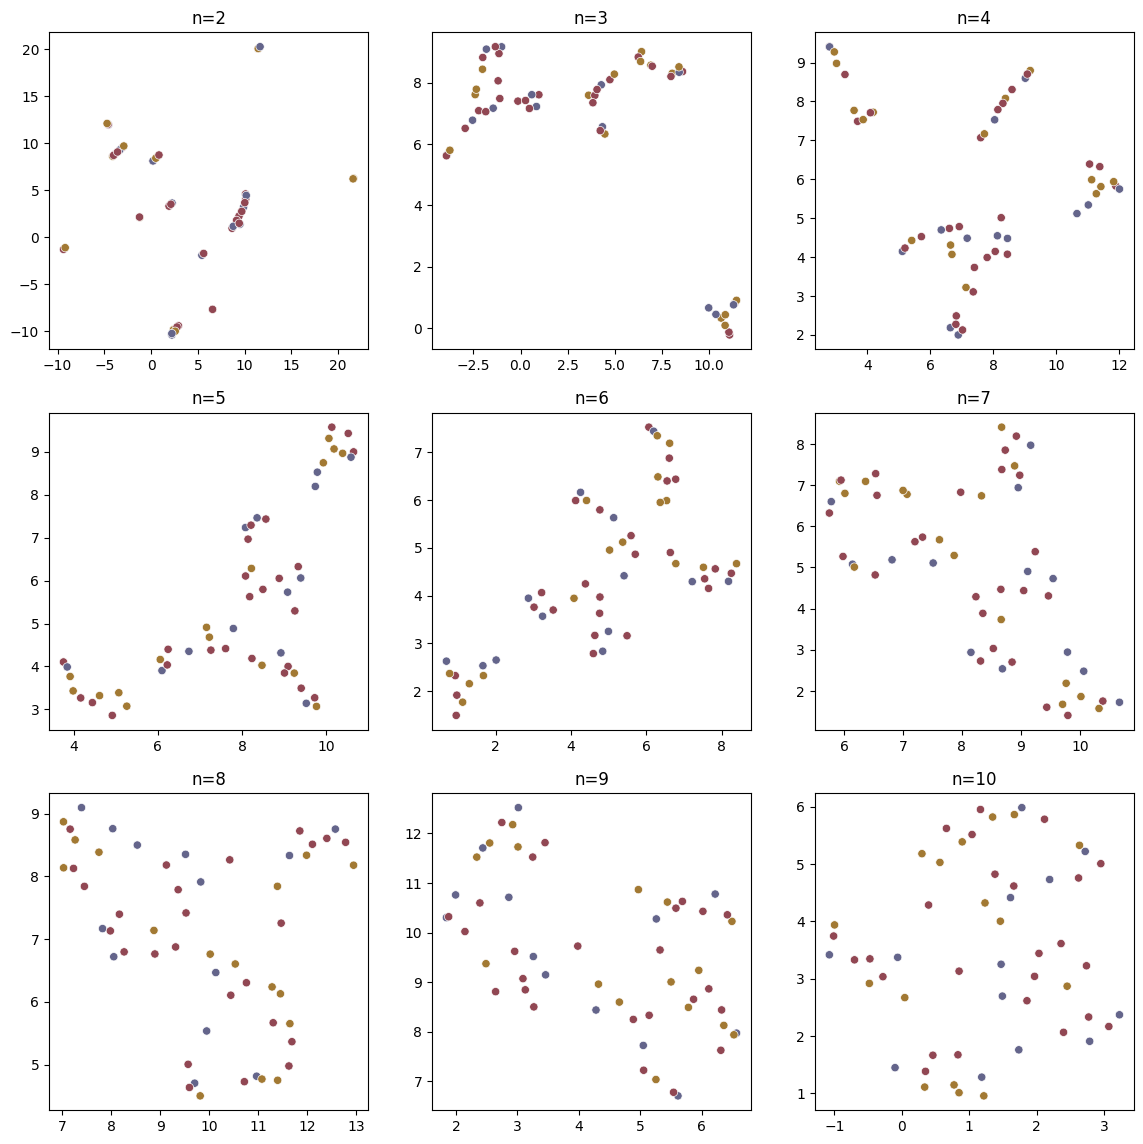

In [98]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(df_encodings)
    sns.scatterplot(x=u[:,0], y=u[:,1], c=colors, ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

In [102]:
import plotly.express as px

# palette = ['#B56C46', '#DCB879', '#A91F47', '#7C7C7C', '#FEB3DD', '#121212', '#6C5269', '#016F8C', '#54275C', '#5A698F']
palette = ['#914753', '#64658B', '#A27933', '#138599']

fit = umap.UMAP(n_neighbors=5, n_components=3, min_dist=0.15)
u = fit.fit_transform(df_encodings)

fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    color=df_classed['penmanship'],
    custom_data=[df_classed['album'], df_classed['track_name']],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="\n".join([
        "track: %{customdata[1]}",
        "album: %{customdata[0]}"
    ])
)

fig.write_html("umap-topics-3d-color-proper-seps.html", include_plotlyjs="cdn", full_html=False)

how do I know thius is the best nn and min dist?


In [133]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(u)

HDBSCAN()

<AxesSubplot:ylabel='$\\lambda$ value'>

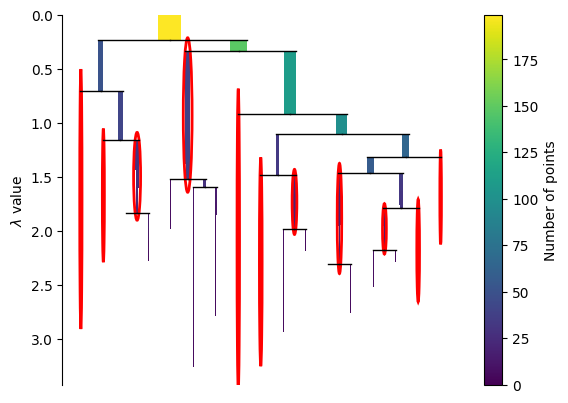

In [134]:
clusterer.condensed_tree_.plot(select_clusters=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

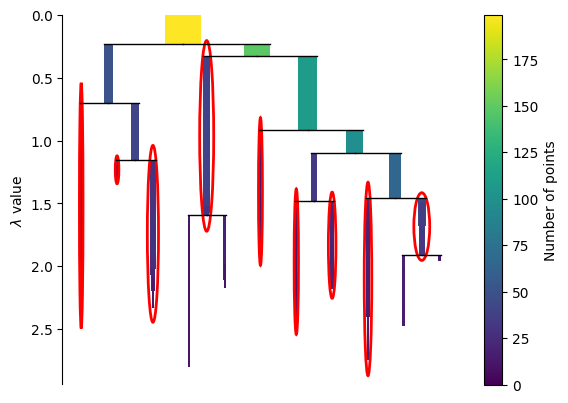

In [147]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10, min_samples=4)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

In [148]:
colors = [str(x) for x in clusterer.labels_]

fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    color=colors,
    custom_data=[df['album'], df['track_name']],
    color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="\n".join([
        "track: %{customdata[1]}",
        "album: %{customdata[0]}"
    ])
)

fig.write_html("hdbscan-topics-3d-proper-seps.html", include_plotlyjs="cdn", full_html=False)

topics:

In [168]:
classes = {}
for label in set(clusterer.labels_):
    classes[label] = {
        'vocab': set(),
        'tokens': [],
        'tfidf_array': None
    }
classes

{0: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 1: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 2: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 3: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 4: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 5: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 6: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 7: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 8: {'vocab': set(), 'tokens': [], 'tfidf_array': None}}

In [151]:
df['class'] = clusterer.labels_

df.head(25)

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics-url,class
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,0.1700,0.8330,0.001790,0.1450,0.529,81.112,214707,I'm like the water when your ship rolled in th...,https://genius.com/Taylor-swift-willow-lyrics,6
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,0.0377,0.9200,0.000000,0.1130,0.320,171.319,244000,You booked the night train for a reason So you...,https://genius.com/Taylor-swift-champagne-prob...,8
2,spotify:track:3Dby3p1m6IOZn2gIIqECgK,3,gold rush,evermore (deluxe version),Taylor Swift,True,0.512,0.462,9,-10.491,0.0408,0.8300,0.166000,0.1210,0.353,112.050,185320,"Gleaming, twinkling Eyes like sinking ships on...",https://genius.com/Taylor-swift-gold-rush-lyrics,3
3,spotify:track:6sQckd3Z8NPxVVKUnavY1F,4,‘tis the damn season,evermore (deluxe version),Taylor Swift,False,0.575,0.434,5,-8.193,0.0312,0.7350,0.000066,0.1050,0.348,145.916,229840,If I wanted to know who you were hanging with ...,https://genius.com/Taylor-swift-tis-the-damn-s...,3
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,0.0488,0.8780,0.000027,0.0797,0.221,74.952,245440,I sit and watch you reading with your head low...,https://genius.com/Taylor-swift-tolerate-it-ly...,1
5,spotify:track:6uwfVkaOM1mcMkFmSn35ix,6,"no body, no crime (feat. HAIM)",evermore (deluxe version),Taylor Swift,False,0.546,0.613,7,-7.589,0.0264,0.4180,0.000000,0.1030,0.535,79.015,215627,He did it He did it Este's a friend of mine We...,https://genius.com/Taylor-swift-no-body-no-cri...,7
6,spotify:track:55Vf4bimc1Rtfg0PAQRAo2,7,happiness,evermore (deluxe version),Taylor Swift,True,0.559,0.334,11,-10.733,0.0376,0.8700,0.000000,0.1140,0.211,122.079,315147,"Honey, when I'm above the trees I see this for...",https://genius.com/Taylor-swift-happiness-lyrics,4
7,spotify:track:66tOfHVH3aUrscg8vExRV4,8,dorothea,evermore (deluxe version),Taylor Swift,False,0.605,0.488,4,-8.322,0.0264,0.6960,0.000000,0.1290,0.354,119.966,225880,"Hey, Dorothea, do you ever stop and think abou...",https://genius.com/Taylor-swift-dorothea-lyrics,8
8,spotify:track:2awNGIJHodfLZSClB3PYhz,9,coney island (feat. The National),evermore (deluxe version),Taylor Swift,False,0.537,0.537,8,-11.266,0.0617,0.8190,0.000904,0.1420,0.292,107.895,275320,Break my soul in two looking for you But you'r...,https://genius.com/Taylor-swift-coney-island-l...,3
9,spotify:track:43Ykum9T72UOPhBN31grpN,10,ivy,evermore (deluxe version),Taylor Swift,True,0.515,0.545,2,-9.277,0.0353,0.8550,0.000020,0.0921,0.535,88.856,260440,How's one to know? I'd meet you where the spir...,https://genius.com/Taylor-swift-ivy-lyrics,3


In [152]:
alpha = re.compile(r'[^a-zA-Z ]+')
df['tokens'] = df['lyrics'].apply(lambda x: alpha.sub('', x).lower())

df

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics-url,class,tokens
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,...,0.833,0.001790,0.1450,0.529,81.112,214707,I'm like the water when your ship rolled in th...,https://genius.com/Taylor-swift-willow-lyrics,6,im like the water when your ship rolled in tha...
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,...,0.920,0.000000,0.1130,0.320,171.319,244000,You booked the night train for a reason So you...,https://genius.com/Taylor-swift-champagne-prob...,8,you booked the night train for a reason so you...
2,spotify:track:3Dby3p1m6IOZn2gIIqECgK,3,gold rush,evermore (deluxe version),Taylor Swift,True,0.512,0.462,9,-10.491,...,0.830,0.166000,0.1210,0.353,112.050,185320,"Gleaming, twinkling Eyes like sinking ships on...",https://genius.com/Taylor-swift-gold-rush-lyrics,3,gleaming twinkling eyes like sinking ships on ...
3,spotify:track:6sQckd3Z8NPxVVKUnavY1F,4,‘tis the damn season,evermore (deluxe version),Taylor Swift,False,0.575,0.434,5,-8.193,...,0.735,0.000066,0.1050,0.348,145.916,229840,If I wanted to know who you were hanging with ...,https://genius.com/Taylor-swift-tis-the-damn-s...,3,if i wanted to know who you were hanging with ...
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,...,0.878,0.000027,0.0797,0.221,74.952,245440,I sit and watch you reading with your head low...,https://genius.com/Taylor-swift-tolerate-it-ly...,1,i sit and watch you reading with your head low...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,spotify:track:7712gjoih4QoDbXpljEk21,16,Paris,Midnights (3am Edition),Taylor Swift,False,0.700,0.509,7,-10.547,...,0.112,0.000033,0.1370,0.345,110.947,196259,"""Your ex-friend's sister Met someone at a club...",https://genius.com/Taylor-swift-paris-lyrics,1,your exfriends sister met someone at a club an...
195,spotify:track:5kiZGSxgqPdv6rbqL9THdd,17,High Infidelity,Midnights (3am Edition),Taylor Swift,False,0.646,0.529,10,-10.179,...,0.723,0.000000,0.0885,0.755,87.862,231475,"Lock broken, slur spoken Wound open, game toke...",https://genius.com/Taylor-swift-high-infidelit...,7,lock broken slur spoken wound open game token ...
196,spotify:track:6wAFvJPpTZVirBKGZ4EnMW,18,Glitch,Midnights (3am Edition),Taylor Swift,False,0.675,0.466,11,-9.738,...,0.361,0.000000,0.1100,0.347,140.864,148781,We were supposed to be just friends You don't ...,https://genius.com/Taylor-swift-glitch-lyrics,7,we were supposed to be just friends you dont l...
197,spotify:track:0aV5uARAknQgYhBaK944FP,19,"Would've, Could've, Should've",Midnights (3am Edition),Taylor Swift,False,0.483,0.840,7,-6.508,...,0.430,0.000575,0.1460,0.550,157.979,260362,"If you would've blinked, then I would've Looke...",https://genius.com/Taylor-swift-wouldve-couldv...,8,if you wouldve blinked then i wouldve looked a...


In [153]:
import nltk

df['tokens'] = df['tokens'].apply(lambda x: nltk.tokenize.wordpunct_tokenize(x))

df

,uri,track_number,track_name,album,artist,explicit,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics-url,class,tokens
0,spotify:track:2gVhfX2Gy1T9kDuS9azrF7,1,willow,evermore (deluxe version),Taylor Swift,False,0.392,0.574,7,-9.195,...,0.833,0.001790,0.1450,0.529,81.112,214707,I'm like the water when your ship rolled in th...,https://genius.com/Taylor-swift-willow-lyrics,6,"[im, like, the, water, when, your, ship, rolle..."
1,spotify:track:1gcyHQpBQ1lfXGdhZmWrHP,2,champagne problems,evermore (deluxe version),Taylor Swift,True,0.462,0.240,0,-12.077,...,0.920,0.000000,0.1130,0.320,171.319,244000,You booked the night train for a reason So you...,https://genius.com/Taylor-swift-champagne-prob...,8,"[you, booked, the, night, train, for, a, reaso..."
2,spotify:track:3Dby3p1m6IOZn2gIIqECgK,3,gold rush,evermore (deluxe version),Taylor Swift,True,0.512,0.462,9,-10.491,...,0.830,0.166000,0.1210,0.353,112.050,185320,"Gleaming, twinkling Eyes like sinking ships on...",https://genius.com/Taylor-swift-gold-rush-lyrics,3,"[gleaming, twinkling, eyes, like, sinking, shi..."
3,spotify:track:6sQckd3Z8NPxVVKUnavY1F,4,‘tis the damn season,evermore (deluxe version),Taylor Swift,False,0.575,0.434,5,-8.193,...,0.735,0.000066,0.1050,0.348,145.916,229840,If I wanted to know who you were hanging with ...,https://genius.com/Taylor-swift-tis-the-damn-s...,3,"[if, i, wanted, to, know, who, you, were, hang..."
4,spotify:track:6lCvK2AR2uOKkVFCVlAzzm,5,tolerate it,evermore (deluxe version),Taylor Swift,True,0.316,0.361,9,-10.381,...,0.878,0.000027,0.0797,0.221,74.952,245440,I sit and watch you reading with your head low...,https://genius.com/Taylor-swift-tolerate-it-ly...,1,"[i, sit, and, watch, you, reading, with, your,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,spotify:track:7712gjoih4QoDbXpljEk21,16,Paris,Midnights (3am Edition),Taylor Swift,False,0.700,0.509,7,-10.547,...,0.112,0.000033,0.1370,0.345,110.947,196259,"""Your ex-friend's sister Met someone at a club...",https://genius.com/Taylor-swift-paris-lyrics,1,"[your, exfriends, sister, met, someone, at, a,..."
195,spotify:track:5kiZGSxgqPdv6rbqL9THdd,17,High Infidelity,Midnights (3am Edition),Taylor Swift,False,0.646,0.529,10,-10.179,...,0.723,0.000000,0.0885,0.755,87.862,231475,"Lock broken, slur spoken Wound open, game toke...",https://genius.com/Taylor-swift-high-infidelit...,7,"[lock, broken, slur, spoken, wound, open, game..."
196,spotify:track:6wAFvJPpTZVirBKGZ4EnMW,18,Glitch,Midnights (3am Edition),Taylor Swift,False,0.675,0.466,11,-9.738,...,0.361,0.000000,0.1100,0.347,140.864,148781,We were supposed to be just friends You don't ...,https://genius.com/Taylor-swift-glitch-lyrics,7,"[we, were, supposed, to, be, just, friends, yo..."
197,spotify:track:0aV5uARAknQgYhBaK944FP,19,"Would've, Could've, Should've",Midnights (3am Edition),Taylor Swift,False,0.483,0.840,7,-6.508,...,0.430,0.000575,0.1460,0.550,157.979,260362,"If you would've blinked, then I would've Looke...",https://genius.com/Taylor-swift-wouldve-couldv...,8,"[if, you, wouldve, blinked, then, i, wouldve, ..."


In [169]:
for index, row in df.iterrows():
    classes[row['class']]['tokens'].extend(row['tokens'])

# print(classes)

In [170]:


for c in classes.keys():
    stopwords = set(list(nltk.corpus.stopwords.words('english')) + ['oh', 'im', 'ohoh', 'eh', 'ah', ])
    classes[c]['tokens'] = [
        word for word in classes[c]['tokens'] if word not in stopwords
    ]
    print(f"{c}: {len(classes[c]['tokens'])}")


0: 1937
1: 7018
2: 1734
3: 5328
4: 2157
5: 2148
6: 3662
7: 3528
8: 8247


In [171]:
vocab = set()
for c in classes.keys():
    vocab = vocab.union(set(classes[c]['tokens']))
    classes[c]['vocab'] = set(classes[c]['tokens'])

In [172]:
# tf

tf = np.zeros((len(classes.keys()), len(vocab)))

for c, _class in enumerate(classes.keys()):
    for t, term in enumerate(tqdm(vocab)):
        tf[c, t] = classes[_class]['tokens'].count(term)

100%|██████████| 4042/4042 [00:00<00:00, 7182.74it/s]


In [173]:
tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 1., ..., 0., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [174]:
# idf

idf = np.zeros((1, len(vocab)))

# calculate average number of words per class
A = tf.sum() / tf.shape[0]

for t, term in enumerate(tqdm(vocab)):
    # frequency of term t across all classes
    f_t = tf[:,t].sum()
    # calculate IDF
    idf_score = np.log(1 + (A / f_t))
    idf[0, t] = idf_score

100%|██████████| 4042/4042 [00:00<00:00, 155478.51it/s]


In [175]:
idf

array([[6.09237071, 6.67915241, 8.28758434, ..., 8.28758434, 6.90204456,
        8.28758434]])

In [177]:
tf_idf = tf*idf

tf_idf

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [24.36948285,  0.        ,  8.28758434, ...,  0.        ,
        27.60817824,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  6.67915241,  0.        , ...,  8.28758434,
         0.        ,  0.        ],
       [ 0.        , 20.03745722,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  6.67915241,  0.        , ...,  0.        ,
         0.        ,  8.28758434]])

In [178]:
n = 10

top_idx = np.argpartition(tf_idf, -n)[:, -n:]
top_idx

array([[3488, 2096, 2777,  765,  114,  325, 1116,  735, 1528, 3542],
       [1748,  118, 3055,  412, 1975,   53, 3276, 1060, 3510,  707],
       [1539, 1247, 3132, 3161,   67, 3931, 2146, 1232, 1043, 2317],
       [3923, 1975, 1458,  591, 3136,  412, 3897,  880,  332,  707],
       [2994,  707, 2896, 3689,  552, 1233, 1045,  951, 3897,  118],
       [ 880,  325, 3261, 2641, 2818,  332, 3897, 3482, 3087, 1860],
       [3931, 2886,  707,  880,  525, 2041, 1247,  332,  239, 3740],
       [1851, 2146, 1476,  332,  969, 2288,  412, 3897,  925, 1247],
       [2297,  133,   53, 3897,  118, 1128, 2642,  707,  412,  880]],
      dtype=int64)

In [179]:
vlist = list(vocab)

for c, _class in enumerate(classes.keys()):
    topn_idx = top_idx[c, :]
    topn_terms = [vlist[idx] for idx in topn_idx]
    print(topn_terms)

['way', 'asking', 'last', 'new', 'york', 'wanna', 'welcome', 'woods', 'yet', 'clear']
['night', 'back', 'call', 'never', 'one', 'time', 'red', 'want', 'go', 'like']
['la', 'got', 'beautiful', 'wanted', 'promises', 'come', 'love', 'babe', 'hes', 'ill']
['take', 'one', 'could', 'cause', 'say', 'never', 'know', 'youre', 'dont', 'like']
['well', 'like', 'better', 'said', 'shouldve', 'remember', 'wish', 'would', 'know', 'back']
['youre', 'wanna', 'mean', 'cant', 'didnt', 'dont', 'know', 'isnt', 'look', 'made']
['come', 'baby', 'like', 'youre', 'knows', 'girl', 'got', 'dont', 'shake', 'thats']
['wonderland', 'love', 'yes', 'dont', 'blood', 'trouble', 'never', 'know', 'id', 'got']
['see', 'run', 'time', 'know', 'back', 'think', 'stay', 'like', 'never', 'youre']


In [4]:


df_features['duration_m_s_f'] = pd.to_datetime(df_features['duration_ms'], unit='ms')
df_features['duration_m_s_f'] = df_features['duration_m_s_f'].dt.strftime('%M:%S.%f')

df_features['tempo'] = df_features['tempo'].div(210)
df_features['loudness'] = df_features['loudness']/(-60)
df_features['key'] = df_features['key']/11
df_features['speechiness'] = df_features['speechiness'] / 0.7 

theta = list(df_features.columns)[6:16]
r = list(df_features.loc[145])[6:16]

d = dict(zip(theta, r))

# df_features.describe()

# df_plot = df_features.copy(deep=True)
# df_plot.drop(['date', 'uri', 'link', 'duration_ms'], axis=1, inplace=True)
# df_plot.head(10)

# df_plot['tempo'] = df_plot['tempo'].div(210)
# # df_plot['duration_ms'] = df_plot['duration_ms'].div(df_plot['duration_ms'].max())
# df_plot['loudness'] = df_plot['loudness']/df_plot['loudness'].min()
# df_plot['key'] = df_plot['key']/df_plot['key'].max()
# # df_plot['liveness'] = df_plot['liveness'] * 2  # <--- may need to entirely drop this col
# df_plot['speechiness'] = df_plot['speechiness'] / 0.7  # <--- may need to entirely drop this col


# df_avgs = df_plot.describe()
# df_avgs.head(15)


In [20]:
[i for i in r]
r

[0.548,
 0.611,
 0.09090909090909091,
 0.15,
 0.18714285714285717,
 0.17,
 0.00247,
 0.0762,
 0.725,
 0.9618333333333334]

In [25]:
# import plotly.graph_objects as go
# import plotly.offline as pyo
# import plotly.express as px
# import nbformat

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

colours = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure',
        'beige', 'bisque', 'black', 'blanchedalmond', 'blue',
        'blueviolet', 'brown', 'burlywood', 'cadetblue',
        'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
        'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan',
        'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen',
        'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange',
        'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
        'darkslateblue', 'darkslategray', 'darkslategrey',
        'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue',
        'dimgray', 'dimgrey', 'dodgerblue', 'firebrick',]

song_number = 123
song_list = list(range(0, 10))
# song_list = [i + 122 for i in song_list]


fig = go.Figure()


for i, v in enumerate(song_list):

    r = list(df_features.loc[v])[6:16]
    fig.add_trace(go.Scatterpolar(
            r = r,
            theta = theta,
            mode = 'markers',
            name = df_features['track_name'].loc[v],
            #line_color = colours[-1*i]
        ),)

fig.update_layout(
    template='ggplot2',
    polar = dict(
        radialaxis = dict(range=[0, 1]),
    )
)

fig.update_traces(fill='toself')
fig.update_layout(showlegend=True)
fig.show(renderer="browser")

# theta2 = list(df_avgs.columns)
# print(theta2)
# mean = df_avgs.iloc[[1]].values[0]
# print(mean)

# dfnew = pd.DataFrame(dict(r = mean, theta = theta2))

# print(dfnew.head(10))

# fig = px.line_polar(dfnew, r='r', theta='theta', line_close=True)
# fig.update_traces(fill='toself')
# fig.show(renderer="browser")



NameError: name 'df_features' is not defined

In [51]:
import sweetviz as sv

analyze_report = sv.analyze(df_features)

c:\Users\Ayush\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [100]:
analyze_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


maybe the metrics to really focus on are:

 - Danceability
 - Energy
 - Key
 - loudness
 - speechiness
 - acousticness
 - 